# Morphologic image processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.morphology import (
    area_closing,
    area_opening,
    closing,
    dilation,
    erosion,
    opening,
)

In [2]:
element = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
    ]
)


def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im


def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

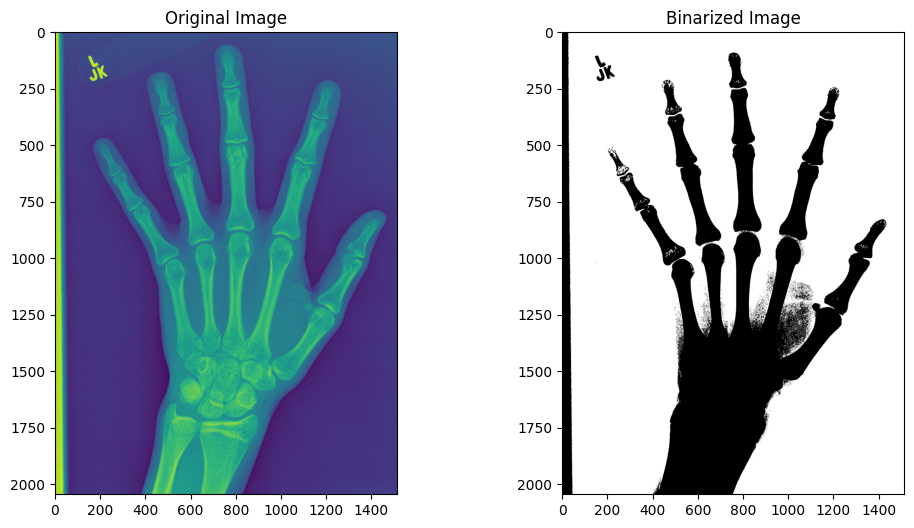

In [3]:
radiografia = imread(
    "/home/fernandoia/Documentos/astraseneka/boneage-training-dataset/1377.png"
)

if radiografia.ndim == 3:
    gray = rgb2gray(radiografia)
else:
    gray = radiografia

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].imshow(radiografia)
ax[0].set_title("Original Image")

binary = gray < 110
ax[1].imshow(binary, cmap="gray")
ax[1].set_title("Binarized Image")

plt.show()

/tmp/ipykernel_2936092/2804461812.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(multi_eroded)


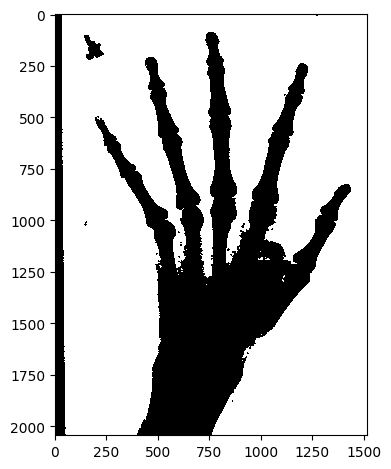

In [4]:
multi_eroded = multi_ero(binary, 2, element)
imshow(multi_eroded)

Text(0.5, 1.0, 'Closed Image')

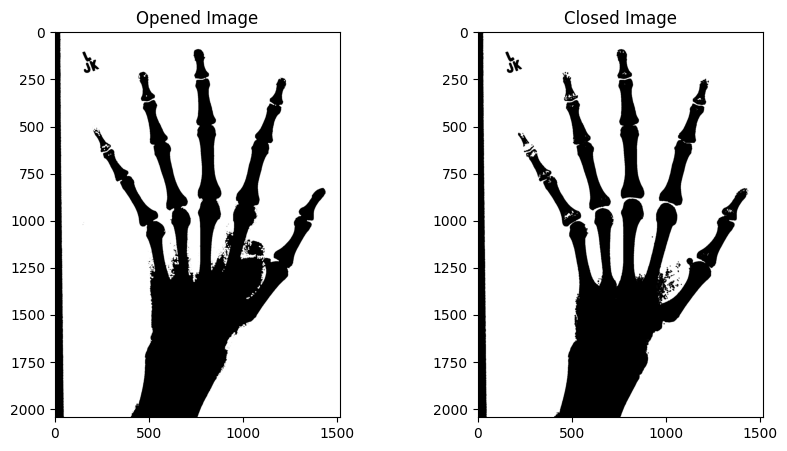

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(opening(binary, element), cmap="gray")
ax[0].set_title("Opened Image")
ax[1].imshow(closing(binary, element), cmap="gray")
ax[1].set_title("Closed Image")

/tmp/ipykernel_2936092/3622317515.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(opened)


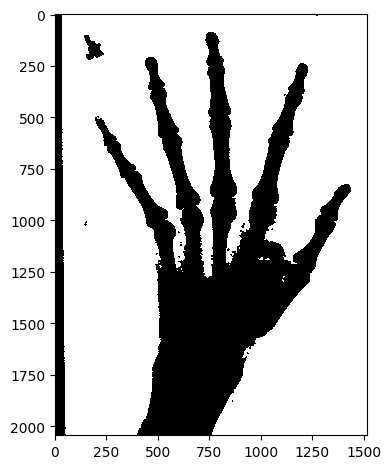

In [6]:
opened = opening(multi_eroded)
imshow(opened)

/tmp/ipykernel_2936092/2439819079.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(multi_diluted)


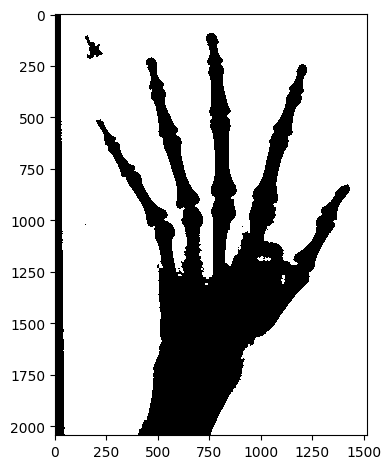

In [7]:
multi_diluted = multi_dil(opened, 2, element)
imshow(multi_diluted)

/tmp/ipykernel_2936092/2419847381.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(area_morphed)


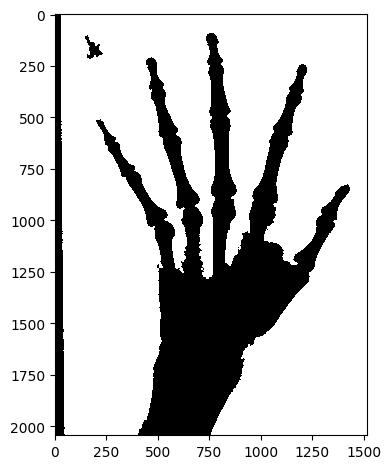

In [8]:
area_morphed = area_opening(area_closing(multi_diluted, 1000), 1000)
imshow(area_morphed)

/tmp/ipykernel_2936092/2419847381.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(area_morphed)


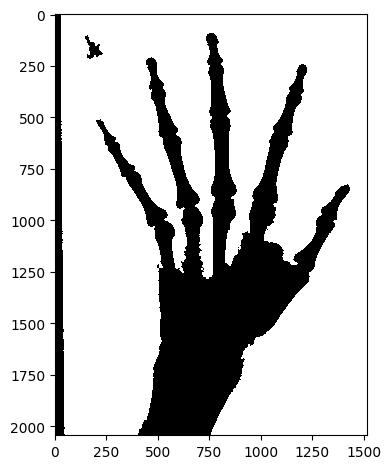

In [9]:
area_morphed = area_opening(area_closing(multi_diluted, 1000), 1000)
imshow(area_morphed)